# Nama : Ahmad Fathan Syakir
# NIM  : 0110217055







In [4]:
import numpy as np
import pandas as pd

In [5]:
dataset = pd.read_excel('P1-SuperStoreUS-2015-tugas.xlsx')
dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,United States,West,Washington,Anacortes,98221.0,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter,0.60,United States,West,California,San Gabriel,91776.0,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,United States,East,New Jersey,Roselle,7203.0,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,United States,Central,Minnesota,Prior Lake,55372.0,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,0.56,United States,Central,Minnesota,Prior Lake,55372.0,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,Storage & Organization,Small Box,Crate-A-Files™,0.59,United States,Central,Illinois,Danville,61832.0,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,Telephones and Communication,Medium Box,Bell Sonecor JB700 Caller ID,0.60,United States,Central,Illinois,Danville,61832.0,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Small Pack,Staples SlimLine Pencil Sharpener,0.60,United States,Central,Illinois,Des Plaines,60016.0,2015-03-29,2015-03-31,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,Office Furnishings,Small Box,Eldon Expressions Punched Metal & Wood Desk Ac...,0.57,United States,East,West Virginia,Fairmont,26554.0,2015-04-04,2015-04-04,-24.7104,15,135.78,87537


1. Deteksi missing values

In [6]:
dataset.apply(lambda x: sum(x.isnull()),axis=0)

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   1
State or Province        0
City                     0
Postal Code              1
Order Date               0
Ship Date                0
Profit                   1
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

2. Perbaiki missing values

In [7]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

In [8]:
dataset['Postal Code'].fillna(dataset['Postal Code'].mean(),inplace=True)

In [9]:
dataset['Profit'].fillna(dataset['Profit'].mean(),inplace=True)

In [10]:
dataset['Region'] = dataset['Region'].astype('category').cat.codes

In [11]:
dataset['Region'].fillna(dataset['Region'].mean(),inplace=True)

In [12]:
dataset.apply(lambda x: sum(x.isnull()),axis=0)

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

3. Ubah label kategori menjadi nilai number

Data Kategori
*   order priority
*   ship mode
*   customer segmen
*   product category
*   product sub-category
*   product container
*   country
*   state or province
*   city



In [13]:
dataset['Order Priority'] = dataset['Order Priority'].astype('category').cat.codes
dataset['Ship Mode'] = dataset['Ship Mode'].astype('category').cat.codes
dataset['Customer Segmen'] = dataset['Customer Segment'].astype('category').cat.codes
dataset['Product Category'] = dataset['Product Category'].astype('category').cat.codes
dataset['Product Sub-Category'] = dataset['Product Sub-Category'].astype('category').cat.codes
dataset['Product Container'] = dataset['Product Container'].astype('category').cat.codes
dataset['Country'] = dataset['Country'].astype('category').cat.codes
dataset['State or Province'] = dataset['State or Province'].astype('category').cat.codes
dataset['City'] = dataset['City'].astype('category').cat.codes

In [14]:
dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Customer Segmen
0,20847,2,0.01,2.84,0.93,3,Bonnie Potter,1,Corporate,1,11,6,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,0,3,45,16,98221.0,2015-01-07,2015-01-08,4.5600,4,13.01,88522,1
1,20228,5,0.02,500.98,26.00,5,Ronnie Proctor,0,Home Office,0,3,1,Global Troy™ Executive Leather Low-Back Tilter,0.60,0,3,3,691,91776.0,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,2
2,21776,0,0.06,9.48,7.29,11,Marcus Dunlap,2,Home Office,0,8,5,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,0,1,28,666,7203.0,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,2
3,24844,4,0.09,78.69,19.99,14,Gwendolyn F Tyson,2,Small Business,0,8,4,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,0,0,21,626,55372.0,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,3
4,24846,4,0.08,3.28,2.31,14,Gwendolyn F Tyson,2,Small Business,1,11,6,Newell 321,0.56,0,0,21,626,55372.0,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,2,0.01,10.90,7.46,3397,Andrea Shaw,2,Small Business,1,14,4,Crate-A-Files™,0.59,0,0,11,171,61832.0,2015-03-11,2015-03-12,-116.7600,18,207.31,87536,3
1948,19843,2,0.10,7.99,5.03,3397,Andrea Shaw,2,Small Business,2,16,3,Bell Sonecor JB700 Caller ID,0.60,0,0,11,171,61832.0,2015-03-11,2015-03-12,-160.9520,22,143.12,87536,3
1949,26208,5,0.08,11.97,5.81,3399,Marvin Reid,2,Small Business,1,11,5,Staples SlimLine Pencil Sharpener,0.60,0,0,11,183,60016.0,2015-03-29,2015-03-31,-41.8700,5,59.98,87534,3
1950,24911,4,0.10,9.38,4.93,3400,Florence Gold,1,Small Business,0,8,4,Eldon Expressions Punched Metal & Wood Desk Ac...,0.57,0,1,46,234,26554.0,2015-04-04,2015-04-04,-24.7104,15,135.78,87537,3


4. Deteksi outlier

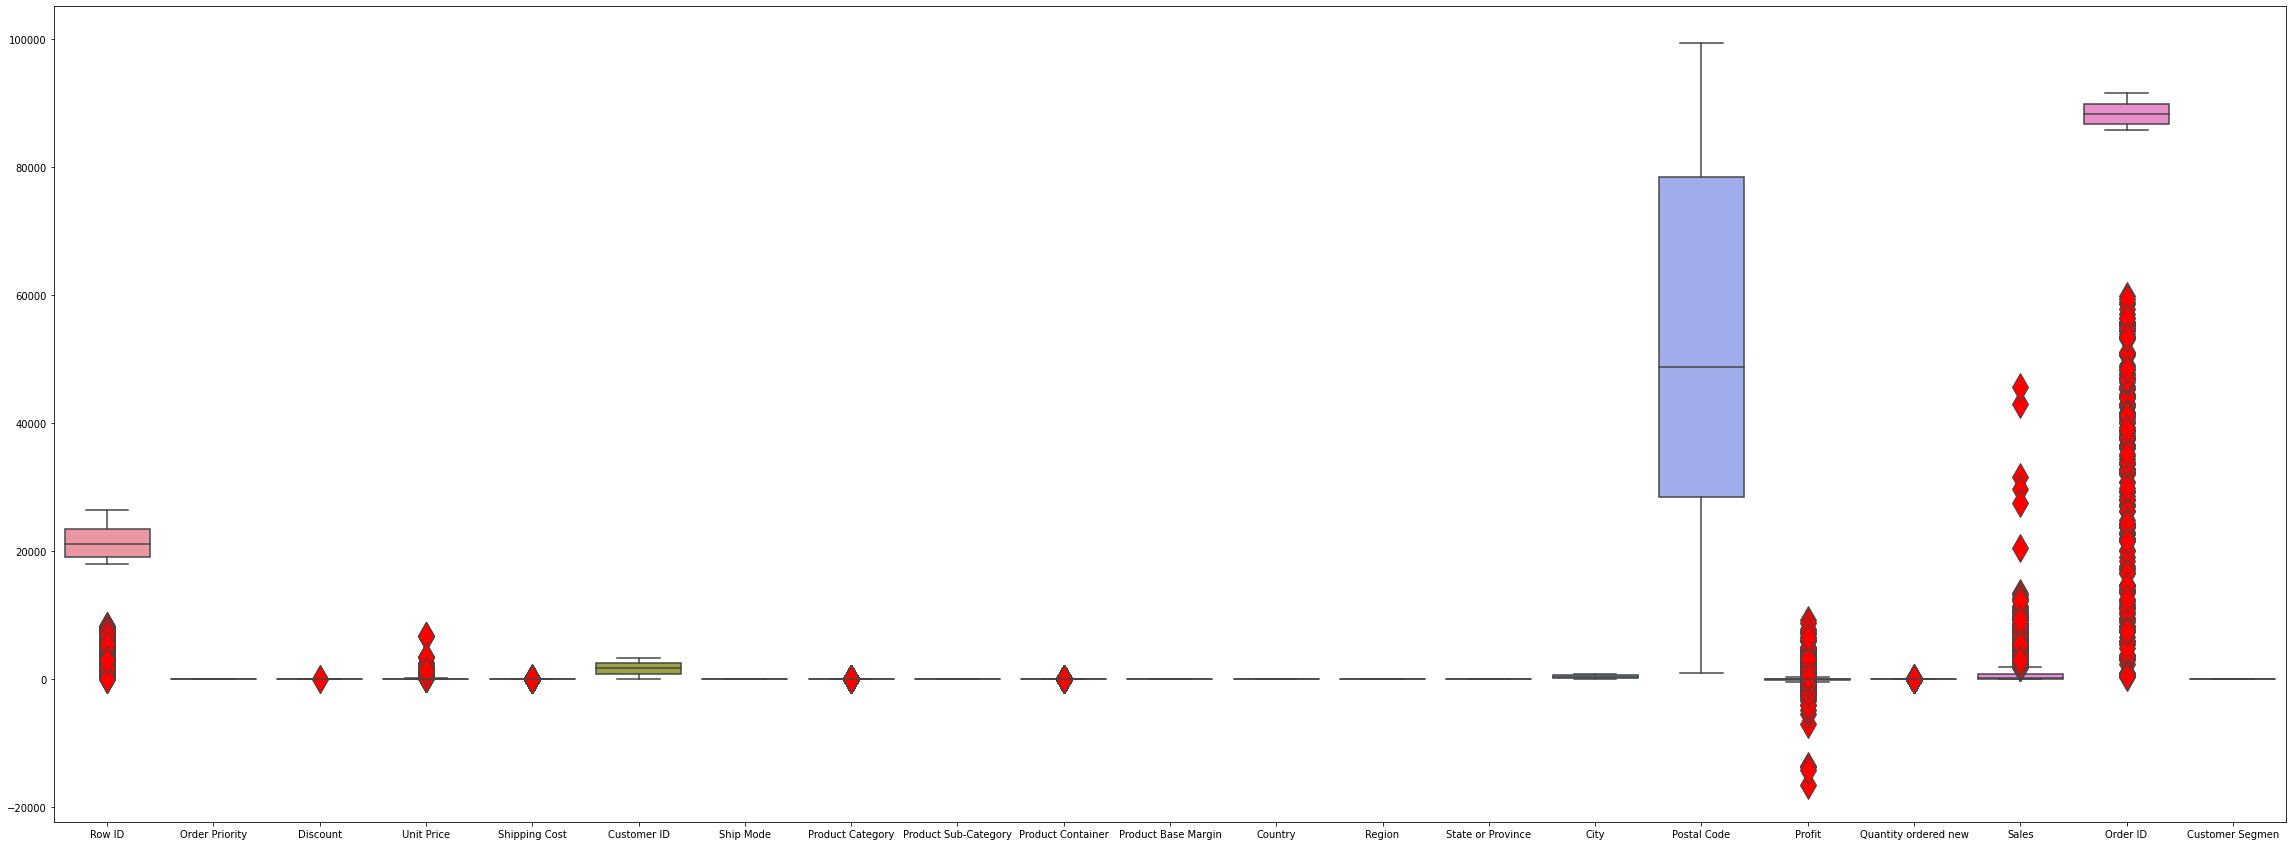

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,15))
flierprops = dict(markerfacecolor='red', markersize=20, linestyle='none')
sns.boxplot(data=dataset, flierprops=flierprops)

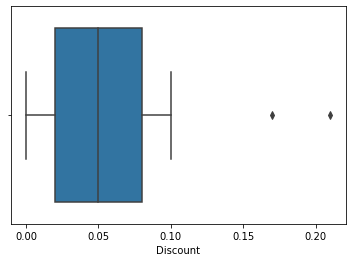

In [109]:
sns.boxplot(x=dataset['Discount'])


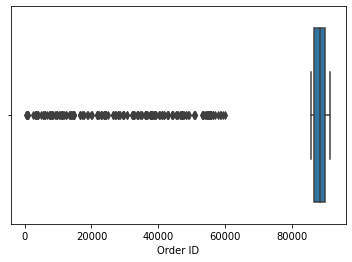

In [93]:
sns.boxplot(x=dataset['Order ID'])


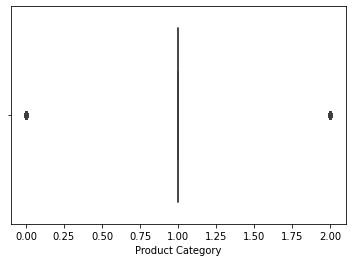

In [95]:
sns.boxplot(x=dataset['Product Category'])


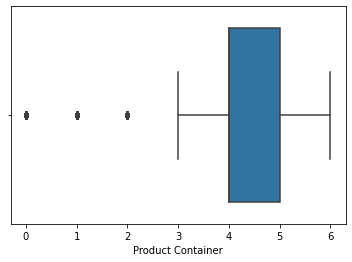

In [96]:
sns.boxplot(x=dataset['Product Container'])


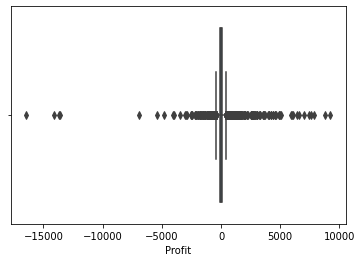

In [99]:
sns.boxplot(x=dataset['Profit'])


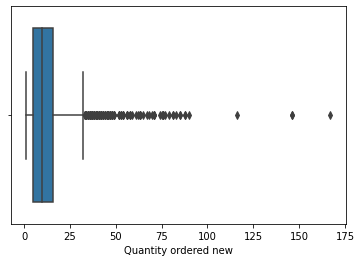

In [100]:
sns.boxplot(x=dataset['Quantity ordered new'])


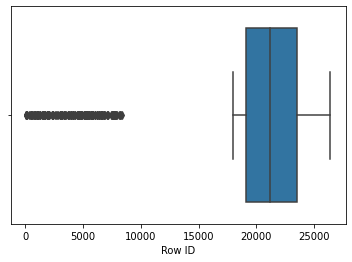

In [102]:
sns.boxplot(x=dataset['Row ID'])


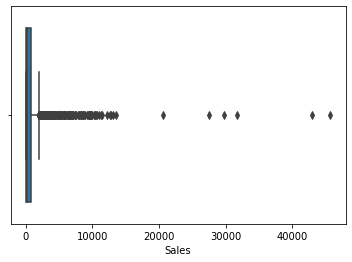

In [103]:
sns.boxplot(x=dataset['Sales'])


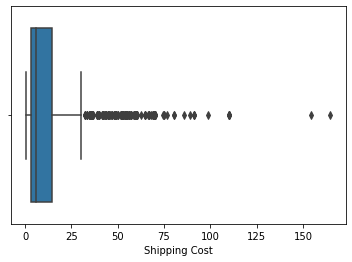

In [106]:
sns.boxplot(x=dataset['Shipping Cost'])


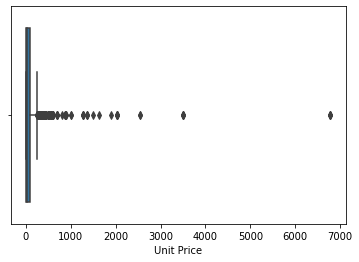

In [108]:
sns.boxplot(x=dataset['Unit Price'])

5. Sesuaikan satuan/skala pada tiap-tiap attribut atau normalisasi

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

norm = ['Discount', 'Unit Price', 'Shipping Cost', 'Product Base Margin', 'Postal Code', 'Profit', 'Quantity ordered new', 'Sales']

for i in norm:
  dataset[i] = scaling.fit_transform(np.array(dataset[i]).reshape(-1,1))

In [28]:
dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Customer Segmen
0,20847,2,0.047619,0.000251,0.002679,3,Bonnie Potter,1,Corporate,1,11,6,SANFORD Liquid Accent™ Tank-Style Highlighters,0.38,0,3,45,16,0.988400,2015-01-07,2015-01-08,0.641173,0.018072,0.000235,88522,1
1,20228,5,0.095238,0.073702,0.155321,5,Ronnie Proctor,0,Home Office,0,3,1,Global Troy™ Executive Leather Low-Back Tilter,0.50,0,3,3,691,0.922876,2015-06-13,2015-06-15,0.811794,0.066265,0.139075,90193,2
2,21776,0,0.285714,0.001230,0.041403,11,Marcus Dunlap,2,Home Office,0,8,5,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.20,0,1,28,666,0.063053,2015-02-15,2015-02-17,0.638902,0.126506,0.004568,90192,2
3,24844,4,0.428571,0.011435,0.118729,14,Gwendolyn F Tyson,2,Small Business,0,8,4,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.16,0,0,21,626,0.552770,2015-05-12,2015-05-14,0.672253,0.090361,0.025412,86838,3
4,24846,4,0.380952,0.000316,0.011081,14,Gwendolyn F Tyson,2,Small Business,1,11,6,Newell 321,0.42,0,0,21,626,0.552770,2015-05-12,2015-05-13,0.640061,0.036145,0.000437,86838,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,2,0.047619,0.001439,0.042438,3397,Andrea Shaw,2,Small Business,1,14,4,Crate-A-Files™,0.48,0,0,11,171,0.618446,2015-03-11,2015-03-12,0.636454,0.102410,0.004484,87536,3
1948,19843,2,0.476190,0.001010,0.027642,3397,Andrea Shaw,2,Small Business,2,16,3,Bell Sonecor JB700 Caller ID,0.50,0,0,11,171,0.618446,2015-03-11,2015-03-12,0.634734,0.126506,0.003080,87536,3
1949,26208,5,0.380952,0.001597,0.032392,3399,Marvin Reid,2,Small Business,1,11,5,Staples SlimLine Pencil Sharpener,0.50,0,0,11,183,0.599984,2015-03-29,2015-03-31,0.639367,0.024096,0.001262,87534,3
1950,24911,4,0.476190,0.001215,0.027034,3400,Florence Gold,1,Small Business,0,8,4,Eldon Expressions Punched Metal & Wood Desk Ac...,0.44,0,1,46,234,0.259788,2015-04-04,2015-04-04,0.640035,0.084337,0.002920,87537,3
